In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from scipy.stats import qmc
from scipy.stats import norm

In [2]:
def create_standard_bm(sigma, number_paths, M, delta_t, m, scramble_func, Sobol_not_Halton, QMC):
    w = np.empty((number_paths,M))

    if QMC == False:
        for m in range(number_paths):
            #create lower trinangular matrix with ones
            lower_tri_matr = np.tril(np.ones([M,M]))
            A =  math.sqrt(delta_t)*lower_tri_matr #! hier sigma multipiziert, ist das so richtig?
            #create Brownian motion
            w[m,:] = A.dot(np.random.randn(M))        
    w = np.concatenate((np.reshape(np.zeros(number_paths),(number_paths,1)), w),axis=1)
    return w

In [7]:
m = 3
number_paths = 2**m #für Sobol sequence
sigma = np.sqrt(0.0004)
M = 1000         #Anzahl der simulierten Monate
delta_t = 1 #muss glaube ich 1 sein, weil sonst stimmt die Varianz nicht 



c = 1 #monthly payment (beliebig?)

BB = False
QMC = False
Sobol_not_Halton = False
scramble_func = False


output = create_standard_bm(sigma, number_paths, M, delta_t, m, scramble_func, Sobol_not_Halton, QMC)



<function matplotlib.pyplot.show(close=None, block=None)>

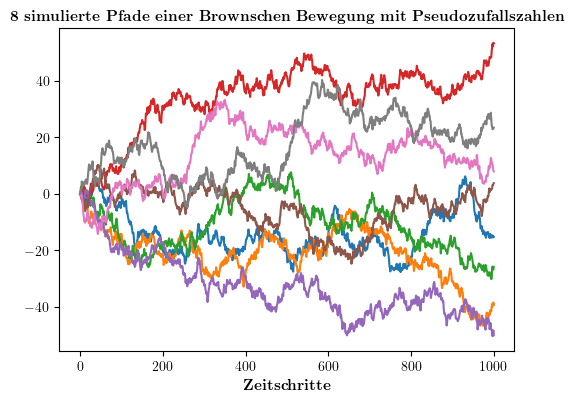

In [12]:
fig = plt.figure(figsize = (5.87086,4.1918))


plt.rc('text', usetex=True)
plt.rc('font', family = 'Computer Modern')

plt.plot(output.T)

plt.title(r'\textbf{8 simulierte Pfade einer Brownschen Bewegung mit Pseudozufallszahlen', fontsize = 11)
plt.xlabel(r'\textbf{Zeitschritte}', fontsize = 11)
fig.savefig('standardBM_plot.png', dpi = 500)
plt.show